In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data=pd.read_csv('online_shoppers_intention.csv')

In [3]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
data.shape

(12330, 18)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

#### Now have a look at product related bounce rates of customers:

In [7]:
x=data.iloc[:,[5,6]].values

In [8]:
x.shape

(12330, 2)

####  Now we have to group the clusters based on the product related duration and Bounce rate

Text(0, 0.5, 'WCSS value')

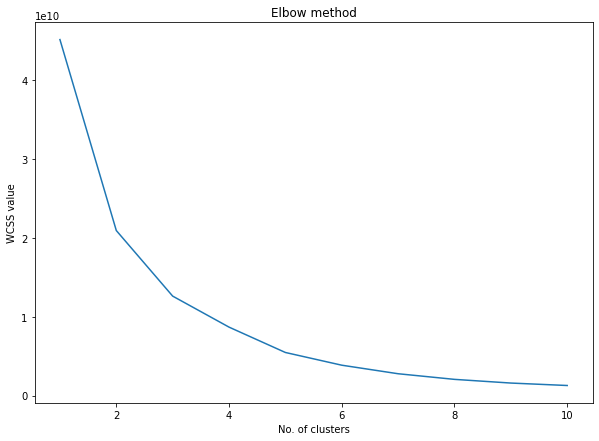

In [9]:
## we are going to use elbow method for selecting the number of clusters
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init = 'k-means++',random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,7))
plt.plot(range(1,11),wcss)
plt.title('Elbow method')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS value')

#### From above figure we can see that after 2 cluster there is graduate change

In [10]:
## So we are selecting the k value as 3
kmeans=KMeans(n_clusters=2,init='k-means++',random_state=0)
ymeans=kmeans.fit_predict(x)
print(ymeans)

[0 0 0 ... 0 0 0]


In [11]:
print(ymeans == 0, 1)

[ True  True  True ...  True  True  True] 1


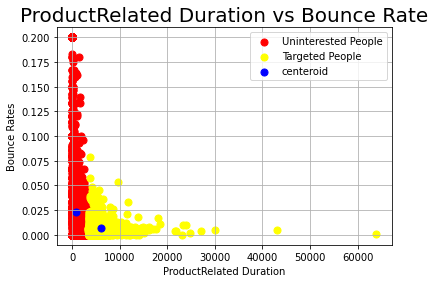

In [12]:
## Now we are going to plot a clusters
plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 50, c = 'red', label = 'Uninterested People')
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 50, c = 'yellow', label = 'Targeted People')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], 
            s = 50, c = 'blue' , label = 'centeroid')

plt.title('ProductRelated Duration vs Bounce Rate', fontsize = 20)
plt.grid()
plt.xlabel('ProductRelated Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

#### we can say that people who are spending more time they are very less likely to leave the website after reading one page and the people who are spending less time they are not intersted as much and they are leaving the website in a very short interval of time..

In [13]:
## Evaluation of our Model
## we have our revenue as dependent variable
data['Revenue']=pd.get_dummies(data['Revenue'],drop_first=True)
y_true=data['Revenue']
y_predicted=ymeans

In [18]:
from sklearn.metrics import confusion_matrix,accuracy_score,adjusted_rand_score,plot_confusion_matrix
print(confusion_matrix(y_true,y_predicted))
print(accuracy_score(y_true,y_predicted))
print(adjusted_rand_score(y_true,y_predicted))

[[9774  648]
 [1625  283]]
0.8156528791565288
0.08359442469281096


In [24]:
!pip install scikit-plot

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

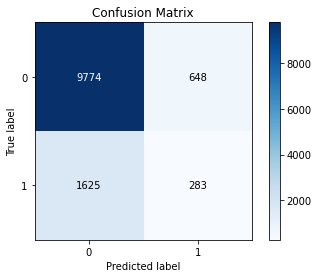

In [26]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_true,y_predicted,normalize=False)

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

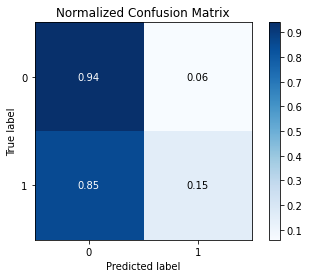

In [27]:
skplt.metrics.plot_confusion_matrix(y_true,y_predicted,normalize=True)